*** Get Data *** - Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.

*** Prepare Data *** - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.

*** Analyze Data *** - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.

*** Present Data *** - The results will be plotted.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
Pandas version: 0.22.0
Matplotlib version 2.0.2


In [8]:
np.seed(111)


#Ffunction to generate test data

def CreateDataSet(Number = 1):
    output = []
    for i in range(Number):
        #Create a weekly (mondays) date range
        rng = pd.date_range(start = '1/1/2009', end = '12/31/2012', freq='W-MON')
        #Create random data
        data = np.randint(low = 25, high= 1000, size = len(rng))
        
        #Status pool
        status = [1, 2, 3]
        
        #Make a random list of statuses
        random_status = [status[np.randint(low=0, high=len(status))]  for i in range(len(rng))]
        
        #State pool
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        
        #Make a random list of states
        random_states = [ states[np.randint(low=0, high=len(states))] for i in range(len(rng))]
        
        output.extend(zip(random_states, random_status, data, rng))
        
    return output

Now that we have a function to generate our test data, lets create some data and stick it into a dataframe.

In [9]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [10]:
dataset[1:10]

[('FL', 1, 901, Timestamp('2009-01-12 00:00:00', freq='W-MON')),
 ('fl', 3, 749, Timestamp('2009-01-19 00:00:00', freq='W-MON')),
 ('FL', 3, 111, Timestamp('2009-01-26 00:00:00', freq='W-MON')),
 ('GA', 1, 300, Timestamp('2009-02-02 00:00:00', freq='W-MON')),
 ('FL', 2, 706, Timestamp('2009-02-09 00:00:00', freq='W-MON')),
 ('TX', 3, 347, Timestamp('2009-02-16 00:00:00', freq='W-MON')),
 ('fl', 2, 143, Timestamp('2009-02-23 00:00:00', freq='W-MON')),
 ('FL', 3, 833, Timestamp('2009-03-02 00:00:00', freq='W-MON')),
 ('NY', 1, 992, Timestamp('2009-03-09 00:00:00', freq='W-MON'))]

In [11]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [12]:
# Save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


### Grab Data from Excel

We will be using the read_excel function to read in data from an Excel file. The function allows you to read in specfic tabs by name or location.

In [13]:
pd.read_excel?

In [14]:
# Location of file
Location = r'Lesson3.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [15]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [16]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


### Prepare Data

This section attempts to clean up the data for analysis.

1. Make sure the state column is all in upper case
2. Only select records where the account status is equal to "1"
3. Merge (NJ and NY) to NY in the state column
4. Remove any outliers (any odd results in the data set)

Lets take a quick look on how some of the State values are upper case and some are lower case

In [17]:
df['State'].unique()

array([u'GA', u'FL', u'fl', u'TX', u'NY', u'NJ'], dtype=object)

To convert all the State values to upper case we will use the upper() function and the dataframe's apply attribute. The lambda function simply will apply the upper function to each value in the State column.

In [18]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())

In [19]:
df['State'].unique()

array([u'GA', u'FL', u'TX', u'NY', u'NJ'], dtype=object)

In [21]:
# Only grab where Status == 1
mask = df['Status'] == 1
print id(df)
df = df[mask]
print id(df)

4650686480
4653394640


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2009-01-05 to 2012-10-22
Data columns (total 3 columns):
State            269 non-null object
Status           269 non-null int64
CustomerCount    269 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.4+ KB


To turn the NJ states to NY we simply...

[df.State == 'NJ'] - Find all records in the State column where they are equal to NJ.
df.State[df.State == 'NJ'] = 'NY' - For all records in the State column where they are equal to NJ, replace them with NY.

In [25]:
# Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [26]:
df['State'].unique()

array([u'GA', u'FL', u'NY', u'TX'], dtype=object)

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the plot() attribute of the dataframe.

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

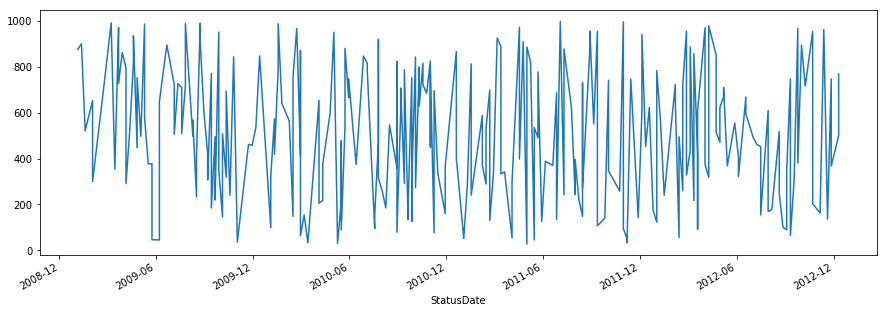

In [27]:
df['CustomerCount'].plot(figsize=(15,5));

If we take a look at the data, we begin to realize that there are multiple values for the same State, StatusDate, and Status combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the CustomerCount column per State, StatusDate, and Status we will get the Total Customer Count per day.

In [30]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


Our task is now to create a new dataframe that compresses the data so we have daily customer counts per State and StatusDate. We can ignore the Status column since all the values in this column are of value 1. To accomplish this we will use the dataframe's functions groupby and sum().

Note that we had to use ** reset_index ** . If we did not, we would not have been able to group by both the State and the StatusDate since the groupby function expects only columns as inputs. The ** reset_index ** function will bring the index StatusDate back to a column in the dataframe.

In [38]:
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

The ** State ** and ** StatusDate ** columns are automatically placed in the index of the ** Daily ** dataframe. You can think of the index as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.

Below we delete the ** Status ** column since it is all equal to one and no longer necessary.

In [39]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [40]:
# What is the index of the dataframe
#Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-

In [41]:
# Select the State index
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [42]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name=u'StatusDate', length=161, freq=None)

Lets now plot the data per State.

As you can see by breaking the graph up by the State column we have a much clearer picture on how the data looks like. Can you spot any outliers?

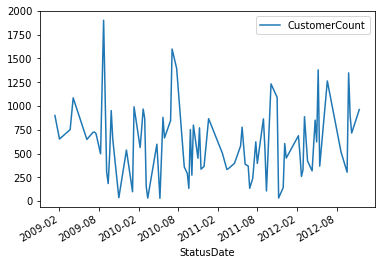

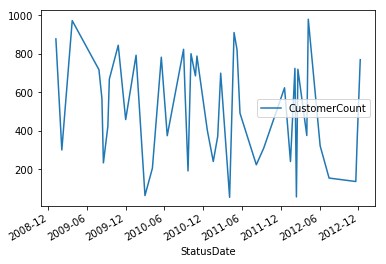

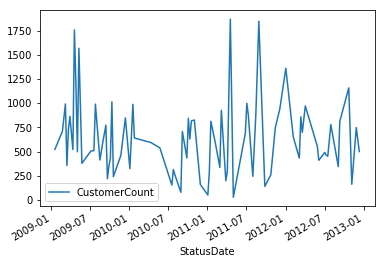

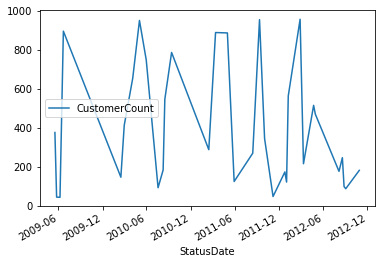

In [43]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

We can also just plot the data on a specific date, like 2012. We can now clearly see that the data for these states is all over the place. since the data consist of weekly customer counts, the variability of the data seems suspect. For this tutorial we will assume bad data and proceed.

In [46]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


In [55]:
df.loc['2009-01']

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,NY,1,522


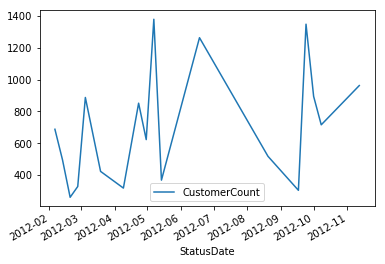

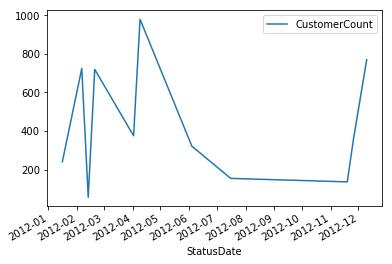

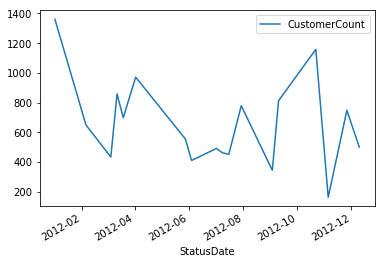

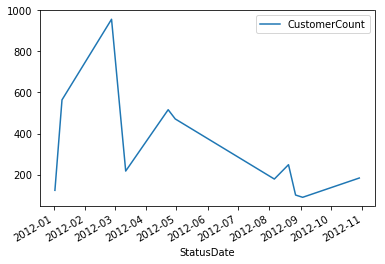

In [56]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.

StateYearMonth - Here we group by State, Year of StatusDate, and Month of StatusDate.
Daily['Outlier'] - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.

We will be using the attribute transform instead of apply. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [58]:
Daily.index.get_level_values(0)

Index([u'FL', u'FL', u'FL', u'FL', u'FL', u'FL', u'FL', u'FL', u'FL', u'FL',
       ...
       u'TX', u'TX', u'TX', u'TX', u'TX', u'TX', u'TX', u'TX', u'TX', u'TX'],
      dtype='object', name=u'State', length=239)

In [60]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])

In [61]:
StateYearMonth

In [71]:
Daily['CustomerCount']

State  StatusDate
FL     2009-01-12     901
       2009-02-02     653
       2009-03-23     752
       2009-04-06    1086
       2009-06-08     649
       2009-07-06     723
       2009-07-13     727
       2009-07-20     710
       2009-08-10     498
       2009-08-24    1902
       2009-09-07     307
       2009-09-14     185
       2009-09-21     495
       2009-09-28     952
       2009-10-05     653
       2009-11-02      36
       2009-12-07     537
       2010-01-04      99
       2010-01-11     992
       2010-02-08     564
       2010-02-15     758
       2010-02-22     968
       2010-03-01     871
       2010-03-08     154
       2010-03-15      32
       2010-04-26     599
       2010-05-10      30
       2010-05-24     881
       2010-05-31     665
       2010-06-28     847
                     ... 
TX     2009-06-22     896
       2010-02-15     148
       2010-03-01     414
       2010-04-05     654
       2010-05-03     951
       2010-05-31     749
       2010-07-19   

In [63]:
len(Daily.CustomerCount)

239

In [70]:
#Daily['CustomerCount']
from numpy import mean
m = mean(Daily['CustomerCount'])


577.25104602510464

In [64]:
StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )

State  StatusDate
FL     2009-01-12    450.500
       2009-02-02    326.500
       2009-03-23    376.000
       2009-04-06    543.000
       2009-06-08    324.500
       2009-07-06    345.500
       2009-07-13    345.500
       2009-07-20    345.500
       2009-08-10   -628.500
       2009-08-24   -628.500
       2009-09-07   -360.875
       2009-09-14   -360.875
       2009-09-21   -360.875
       2009-09-28   -360.875
       2009-10-05    326.500
       2009-11-02     18.000
       2009-12-07    268.500
       2010-01-04   -508.625
       2010-01-11   -508.625
       2010-02-08     27.500
       2010-02-15     27.500
       2010-02-22     27.500
       2010-03-01   -582.750
       2010-03-08   -582.750
       2010-03-15   -582.750
       2010-04-26    299.500
       2010-05-10   -464.500
       2010-05-24   -464.500
       2010-05-31   -464.500
       2010-06-28    423.500
                      ...   
TX     2009-06-22   -509.375
       2010-02-15     74.000
       2010-03-01    207.